<a href="https://www.kaggle.com/code/sudhirsingh108/eda-and-logistic-regression?scriptVersionId=126923481" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing library and loading data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-analytics/HR_comma_sep.csv


In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Explaloratory data analysis

3571 Left the company


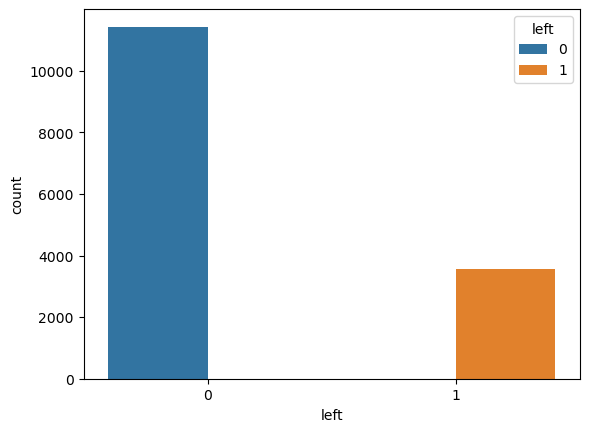

In [8]:

sns.countplot(x ='left', data = df, hue ='left')
print(df['left'].sum(),"Left the company")

The above plot shows that 3571 employees left the company out of  14999

## Realation between Department and employees retention

<AxesSubplot:xlabel='Department'>

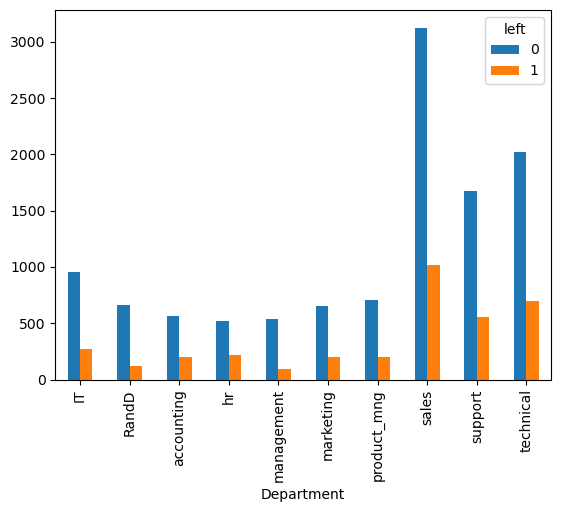

In [9]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

****Here by seeing above bar graph it seems that department is impacting on employees retention 
because almost from every department employees left ****

## Realation between salary and employees retention

<AxesSubplot:xlabel='salary'>

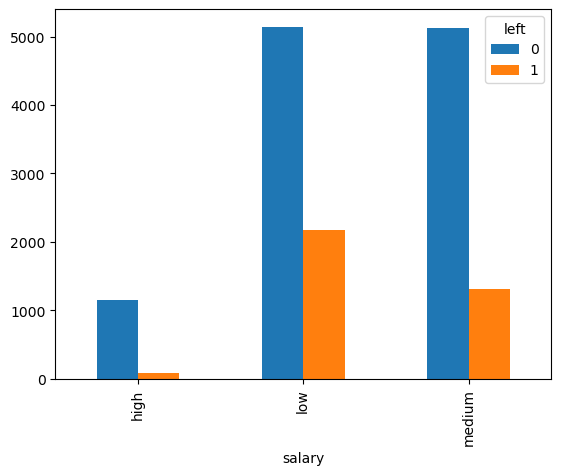

In [10]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

**Employees low income salary are likely to left the organisation and then medium**

## **Realation between Promotion and employees retention**

<AxesSubplot:xlabel='promotion_last_5years'>

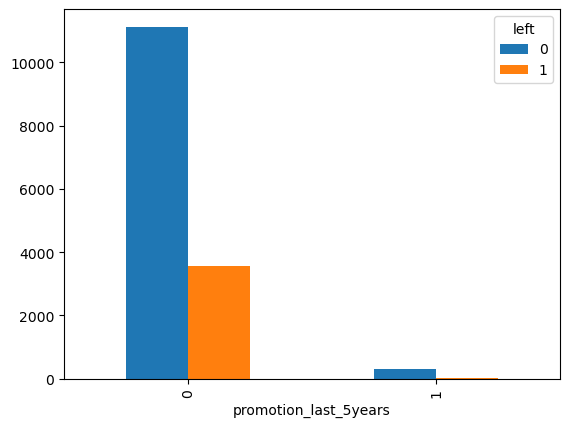

In [11]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind = 'bar')

**Employees with no promotion is more likely to change the company**

## Realation between number of project and employees retention

<AxesSubplot:xlabel='number_project'>

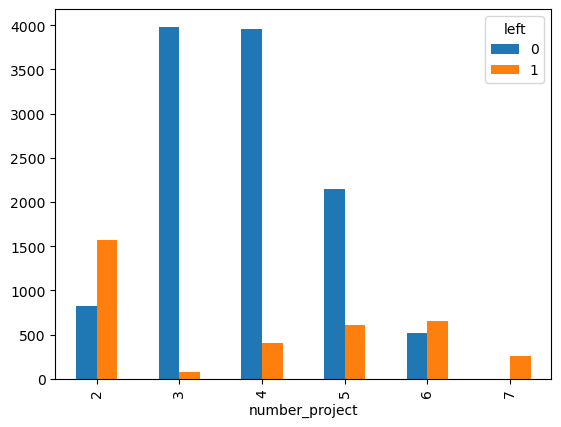

In [12]:
pd.crosstab(df.number_project, df.left).plot(kind = 'bar')

It also sems no relation

## satisfectin level and employees retention

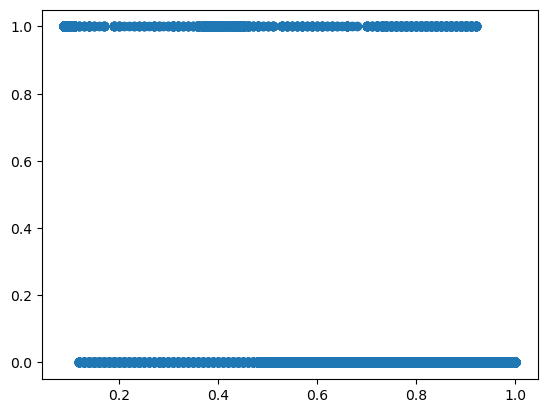

In [13]:
plt.scatter(df.satisfaction_level , df.left)

# Logistic regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

df = pd.get_dummies(df, columns = (['salary']))

In [16]:
y = df.left
x = df.drop(columns = ['left','Department','Work_accident'])


In [17]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = .2)

In [18]:
ytrain

5993     0
237      1
5507     0
6767     0
9826     0
        ..
9014     0
2413     0
8625     0
8777     0
12685    1
Name: left, Length: 11999, dtype: int64

In [19]:
model.fit(xtrain, ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
predicted = model.predict(xtest)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
model.score(xtest,ytest)

0.7743333333333333

# Our Logistic regression model got 71% accuracy

# If you find this helpful please upvote this notebook